<a href="https://colab.research.google.com/github/Buntariga2545/Project/blob/main/2_TSV_Models_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Paper/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_2', usecols=lambda x: 'Unnamed' not in x,)
data

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,อุณหภูมิ,ความชื้น,กระแสลม,...,Clo,Met,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter,เพศ_ชาย,เพศ_หญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [ ]:
data.rename(columns = {'เพศ_หญิง':'เพศหญิง','เพศ_ชาย' : 'เพศชาย', 'seasons_summer' : 'summer', 'seasons_winter' : 'winter', 'พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้' : 'ใต้ร่มไม้', 'พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง' : 'กลางแจ้ง',
                       'พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม' : 'มีหลังคาคลุม', 'พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร' : 'ภายใต้อาคาร', 'อุณหภูมิ' : 'ความรู้สึกถึงอุณหภูมิ', 'ความชื้น' : 'ความรู้สึกถึงความชื้น',
                       'กระแสลม' : 'ความรู้สึกถึงกระแสลม','ความแรงของแสงแดด' : 'ความรู้สึกถึงแสงแดด','เหงื่อบริเวณผิวหนัง' : 'ความรู้สึกถึงเหงื่อ', 'ความร้อน' : 'ความต้องการอุณหภูมิ','ความชื้น.1' : 'ความต้องการความชื้น', 'กระแสลม.1': 'ความต้องการกระแสลม', 'แสงแดด' : 'ความต้องการแสงแดด',
                       'เหงื่อบริเวณผิวหนัง.1': 'ความต้องการเหงื่อ'}, inplace = True)
data

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Clo,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


#Spitt data

##TSV 2

In [ ]:
fo_mapping = {
    -2 :-2,
    -1 :-1,
    0 : 0,
    1 : 1,
    2 : 2,
    3 : 3,
}

data['TSV2'] = data['Thermal_sensation_Vote'].map(fo_mapping)

In [ ]:
data['TSV2'][data['TSV2']==-1] = 1
data['TSV2'][data['TSV2']==0] = 1
data['TSV2'][data['TSV2']==1] = 1

data['TSV2'][data['TSV2']==2] = 2
data['TSV2'][data['TSV2']==3] = 2

<ipython-input-8-d1435c96ad8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TSV2'][data['TSV2']==-1] = 1
<ipython-input-8-d1435c96ad8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TSV2'][data['TSV2']==0] = 1
<ipython-input-8-d1435c96ad8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TSV2'][data['TSV2']==1] = 1
<ipython-input-8-d1435c96ad8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [ ]:
fo_mapping = {
    1 : 0,
    2 : 1,
}

data['TSV2'] = data['TSV2'].map(fo_mapping)

In [ ]:
data.TSV2.value_counts()

#data['TSV2'][data['TSV2']==-1].dropna(axis=0)

0.0    151
1.0     38
Name: TSV2, dtype: int64

In [ ]:
data['TSV2'][data['TSV2']==-2].dropna(axis=0)

Series([], Name: TSV2, dtype: int64)

In [ ]:
data.drop([28, 36, 43, 45], axis = 0, inplace=True)

###แบ่งข้อมูลโดยใช้ 5-fold แล้วจัดการ imbalance class ด้วย smote (TSV2)

In [ ]:
X = data.drop(['Thermal_acceptance', 'Thermal_sensation_Vote', 'TSV2'], axis = 1)
y4 = data['TSV2']

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# ตั้งค่าพารามิเตอร์สำหรับ K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# วนลูปผ่าน K-Fold
for train_index, test_index in kf.split(X):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y4_train, y4_test = y4.iloc[train_index], y4.iloc[test_index]

    # ทำมาตรฐานข้อมูล
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)

    # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
    smote = SMOTE(k_neighbors=2, random_state=42)
    X_train_res, y4_train_res = smote.fit_resample(X_train_scaled, y4_train)


    print(f"Training set size after resampling: {X_train_res.shape}")
    print(f"Test set size: {X_test_scaled.shape}")

Training set size after resampling: (234, 26)
Test set size: (38, 26)
Training set size after resampling: (240, 26)
Test set size: (38, 26)
Training set size after resampling: (236, 26)
Test set size: (38, 26)
Training set size after resampling: (248, 26)
Test set size: (38, 26)
Training set size after resampling: (250, 26)
Test set size: (37, 26)


In [ ]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [ ]:
data.dtypes

Age                         int64
BMI                       float64
Temp                      float64
RH                        float64
V                         float64
Thermal_acceptance         object
Thermal_sensation_Vote      int64
ความรู้สึกถึงอุณหภูมิ       int64
ความรู้สึกถึงความชื้น       int64
ความรู้สึกถึงกระแสลม        int64
ความรู้สึกถึงแสงแดด         int64
ความรู้สึกถึงเหงื่อ         int64
ความต้องการอุณหภูมิ         int64
ความต้องการความชื้น         int64
ความต้องการกระแสลม          int64
ความต้องการแสงแดด           int64
ความต้องการเหงื่อ           int64
TMRT                      float64
Clo                       float64
Met                       float64
ใต้ร่มไม้                   int64
กลางแจ้ง                    int64
มีหลังคาคลุม                int64
ภายใต้อาคาร                 int64
summer                      int64
winter                      int64
เพศชาย                      int64
เพศหญิง                     int64
TSV2                      float64
dtype: object

In [ ]:
data['TSV2'] = data['TSV2'].astype(int)
print(data.dtypes)

Age                         int64
BMI                       float64
Temp                      float64
RH                        float64
V                         float64
Thermal_acceptance         object
Thermal_sensation_Vote      int64
ความรู้สึกถึงอุณหภูมิ       int64
ความรู้สึกถึงความชื้น       int64
ความรู้สึกถึงกระแสลม        int64
ความรู้สึกถึงแสงแดด         int64
ความรู้สึกถึงเหงื่อ         int64
ความต้องการอุณหภูมิ         int64
ความต้องการความชื้น         int64
ความต้องการกระแสลม          int64
ความต้องการแสงแดด           int64
ความต้องการเหงื่อ           int64
TMRT                      float64
Clo                       float64
Met                       float64
ใต้ร่มไม้                   int64
กลางแจ้ง                    int64
มีหลังคาคลุม                int64
ภายใต้อาคาร                 int64
summer                      int64
winter                      int64
เพศชาย                      int64
เพศหญิง                     int64
TSV2                        int64
dtype: object


In [ ]:
#from sklearn.inspection import PartialDependenceDisplay

#disp1 = PartialDependenceDisplay.from_estimator(result, X_train_scaled, feature_names)
#plt.show()

##SVM

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

#mean_squared_error(actual_values, predicted_values)
# taking root of mean squared error
#root_mean_squared_error = sqrt(mean_squared_error)

###TSV 2 ค่า

In [ ]:
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
svm_grid.fit(X_train_res, y4_train_res)
print("best_params :",svm_grid.best_params_)
print("accuracy :",svm_grid.best_score_)

best_params : {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.9119999999999999


In [ ]:
svm = SVC(C= 0.5, gamma= 0.1, kernel='rbf')

svm_pred = svm.fit(X_train_res, y4_train_res)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y_test,y_pred))

print('MSE_train:', format(mean_squared_error(y4_train_res, svm_pred.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y4_test, svm_pred.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y4_train_res, svm_pred.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y4_test, svm_pred.predict(X_test_scaled))))

MSE_train: 0.024
MSE_test: 0.13513513513513514
MAE_train: 0.024
MAE_test: 0.13513513513513514


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


###SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
import shap

# SHAP Interpreter
shapExplainer = shap.TreeExplainer(svm_pred)
shapValues = shapExplainer.shap_values(X)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X, plot_type = 'bar')

###PDP

##SVR

###TSV 2 ค่า

In [ ]:
C = np.array([0.001, 0.01, 0.1, 1, 10])
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
space = [{'kernel': ['linear'], 'C' : C, 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'C' : C, 'gamma' : C, 'epsilon' : epsilon}]

gs = GridSearchCV(SVR(), param_grid = space, scoring = 'r2', cv = 10, n_jobs = -1)
ge_results = gs.fit(X_train_res, y4_train_res)
print("Best parameters :", ge_results.best_score_)
print("Best accuracy :", ge_results.best_params_)
print('R_Square:', format(ge_results.best_score_))
print('Best parameters:', format(ge_results.best_params_))

Best parameters : 0.26434669657630705
Best accuracy : {'C': 10.0, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
R_Square: 0.26434669657630705
Best parameters: {'C': 10.0, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
svr_reg = SVR(C = 10, kernel = 'rbf', epsilon = 0.01, gamma = 0.1)

# Train the model
results = svr_reg.fit(X_train_res, y4_train_res)

# Make predictions on the test set
y_pred = svr_reg.predict(X_test_scaled)

print('MSE_train: {:.15f}'. format(mean_squared_error(y4_train_res, results.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y4_test, results.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y4_train_res, results.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y4_test, results.predict(X_test_scaled))))

MSE_train: 0.000083760227304
MSE_test: 0.09338513088074316
MAE_train: 0.008813074556836095
MAE_test: 0.20338738694460085


X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names


###PDP

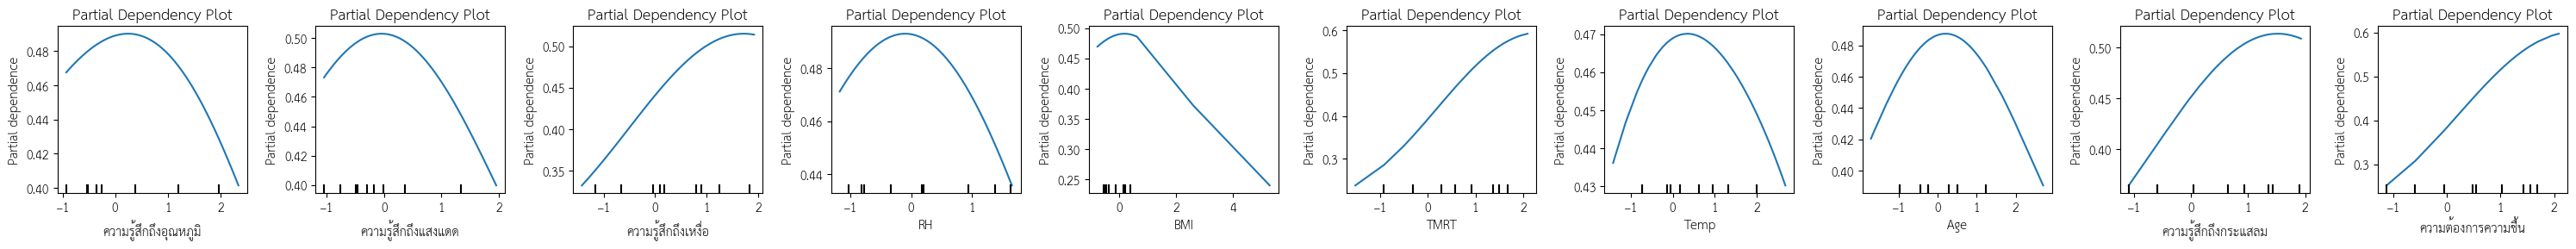

In [ ]:
base_features = ['ความรู้สึกถึงอุณหภูมิ','ความรู้สึกถึงแสงแดด','ความรู้สึกถึงเหงื่อ','RH','BMI','TMRT', 'Temp','Age','ความรู้สึกถึงกระแสลม','ความต้องการความชื้น']
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        results,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

##XGBOOST

In [ ]:
import xgboost as xgb

###TSV 2 ค่า

In [ ]:
param_dist = {
    'max_depth': [5, 9, 10, 14],
    'subsample': [1, 0.8, 0.6, 0.3],
    'colsample_bytree': [1, 0.8, 0.6, 0.3]
}

In [ ]:
#Creating an XGBoost regressor
model = xgb.XGBRegressor()
xgbr = GridSearchCV(model, param_dist)

#Training the model on the training data
xgb_reg = xgbr.fit(X_train_res, y4_train_res)

print("Best parameters :", xgb_reg.best_score_)
print("Best accuracy :", xgb_reg.best_params_)

Best parameters : 0.2998222906403134
Best accuracy : {'colsample_bytree': 0.3, 'max_depth': 5, 'subsample': 0.6}


In [ ]:
#Making predictions on the test set
predictions = xgbr.predict(X_test_scaled)

xgb_reg = xgb.XGBRegressor(colsample_bytree = 0.3, max_depth = 5, subsample = 0.6)

# Train the model
result = xgb_reg.fit(X_train_res, y4_train_res)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test_scaled)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y4_train_res, xgb_reg.predict(X_train_res))
r2_train = r2_score(y4_train_res, xgb_reg.predict(X_train_res))
mae_train = mean_absolute_error(y4_train_res, xgb_reg.predict(X_train_res))

mse_test = mean_squared_error(y4_test, predictions)
r2_test = r2_score(y4_test, predictions)
mae_test = mean_absolute_error(y4_test, predictions)

print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)
print("Mean Absolute Error:", mae_train)

print("Mean Squared Error:", mse_test)
print("R-squared Score:", r2_test)
print("Mean Absolute Error:", mae_test)

Mean Squared Error: 5.372407736013738e-05
R-squared Score: 0.9997851036905594
Mean Absolute Error: 0.004887974455661606
Mean Squared Error: 0.09248599159331336
R-squared Score: 0.5572960752054334
Mean Absolute Error: 0.1830007261691011


###SHAP

In [ ]:
class_names=[0,1]

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
import shap

[19:38:49] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


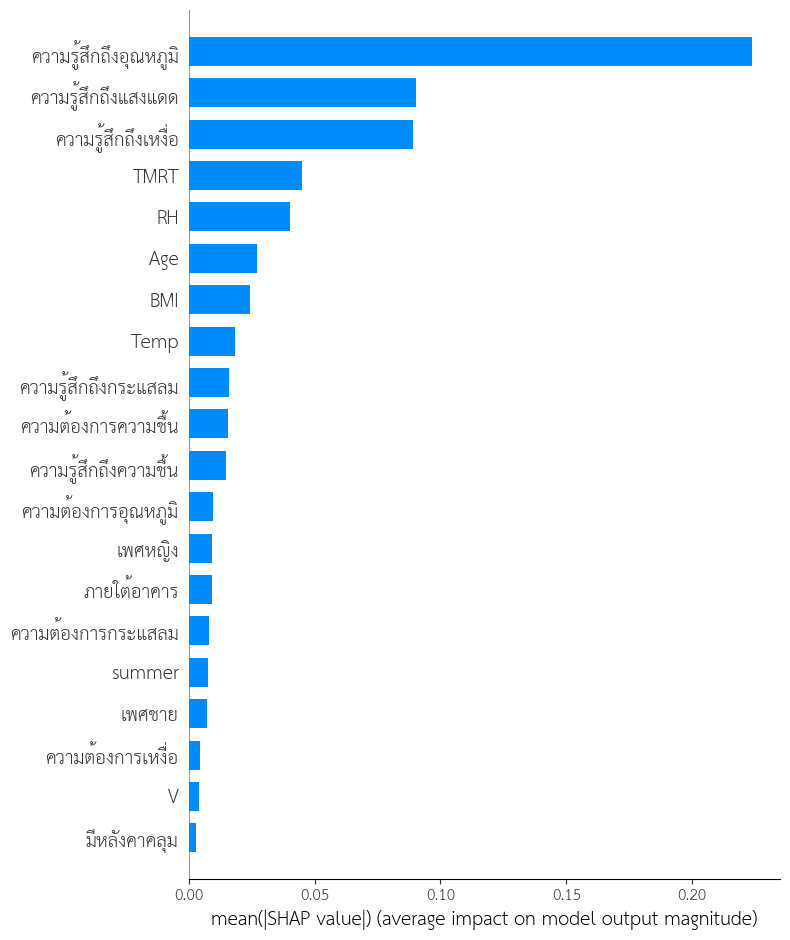

In [ ]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(result)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)


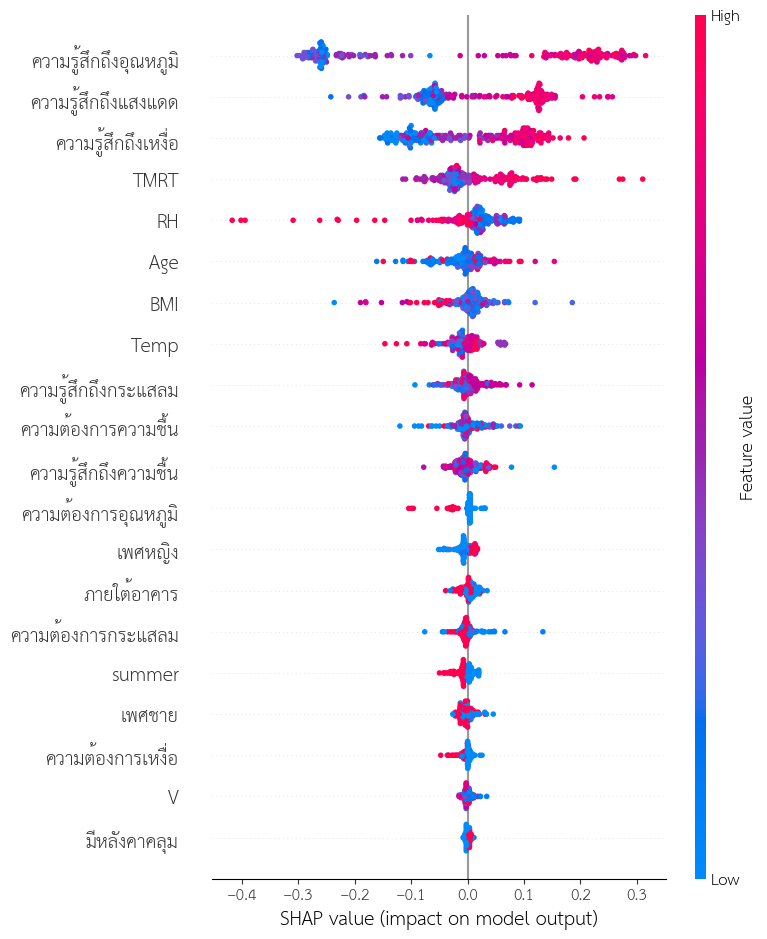

In [ ]:
shap.summary_plot(shapValues, X_train_res)

###PDP

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

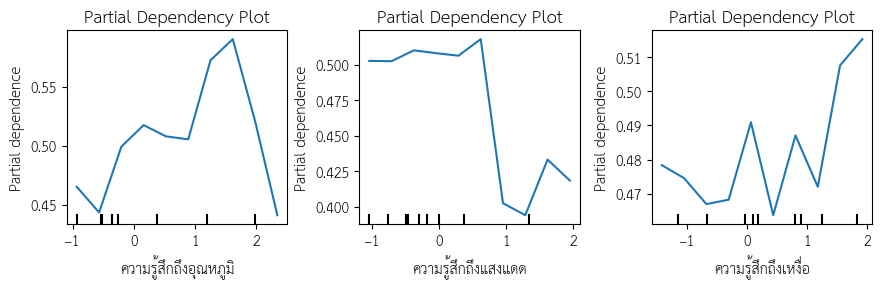

In [ ]:
#'RH','BMI','TMRT', 'Temp','Age','ความรู้สึกถึงกระแสลม','ความต้องการความชื้น'
base_features = ['ความรู้สึกถึงอุณหภูมิ', 'ความรู้สึกถึงแสงแดด', 'ความรู้สึกถึงเหงื่อ',]
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        result,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

##regression

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# mean_squared_error module for applying RMSE
from sklearn.metrics import mean_squared_error as mse

###Lasso

###TSV 2 ค่า

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LassoCV

# Create an instance of Lasso Regression implementation
lasso_cv = LassoCV(cv=5)

# Fit the Lasso model
lasso_cv.fit(X_train_res, y4_train_res)

LassoCV(cv=5)

In [ ]:
# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search with cross-validation
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train_res, y4_train_res)

# Print best parameter values and score
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

print("Best parameters :", lasso_cv.best_params_)
print("Best accuracy :", lasso_cv.best_score_)
print('R_Square:', format(lasso_cv.best_score_))
print('Best parameters:', format(lasso_cv.best_params_))

Best Parameters: {'alpha': 0.01}
Best Score: -0.5199629606065562
Best parameters : {'alpha': 0.01}
Best accuracy : -0.5199629606065562
R_Square: -0.5199629606065562
Best parameters: {'alpha': 0.01}


In [ ]:
# Fit Lasso regression model
lasso = Lasso(alpha=0.01)
lasso_reg = lasso.fit(X_train_res, y4_train_res)

# Evaluate model performance on test set
y_pred = lasso.predict(X_test_scaled)

# Model Score
print("Model Score: ", lasso.score(X_test_scaled, y4_test))

# Lasso Coefficient
lasso.coef_

print('MSE_train:', format(mean_squared_error(y4_train_res, lasso_reg.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y4_test, lasso_reg.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y4_train_res, lasso_reg.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y4_test, lasso_reg.predict(X_test_scaled))))

Model Score:  0.5893412077982284
MSE_train: 0.08187665405298117
MSE_test: 0.08579139121234963
MAE_train: 0.22036120057601635
MAE_test: 0.2078918983262823


X does not have valid feature names, but Lasso was fitted with feature names
X does not have valid feature names, but Lasso was fitted with feature names
X does not have valid feature names, but Lasso was fitted with feature names
X does not have valid feature names, but Lasso was fitted with feature names


###SHAP

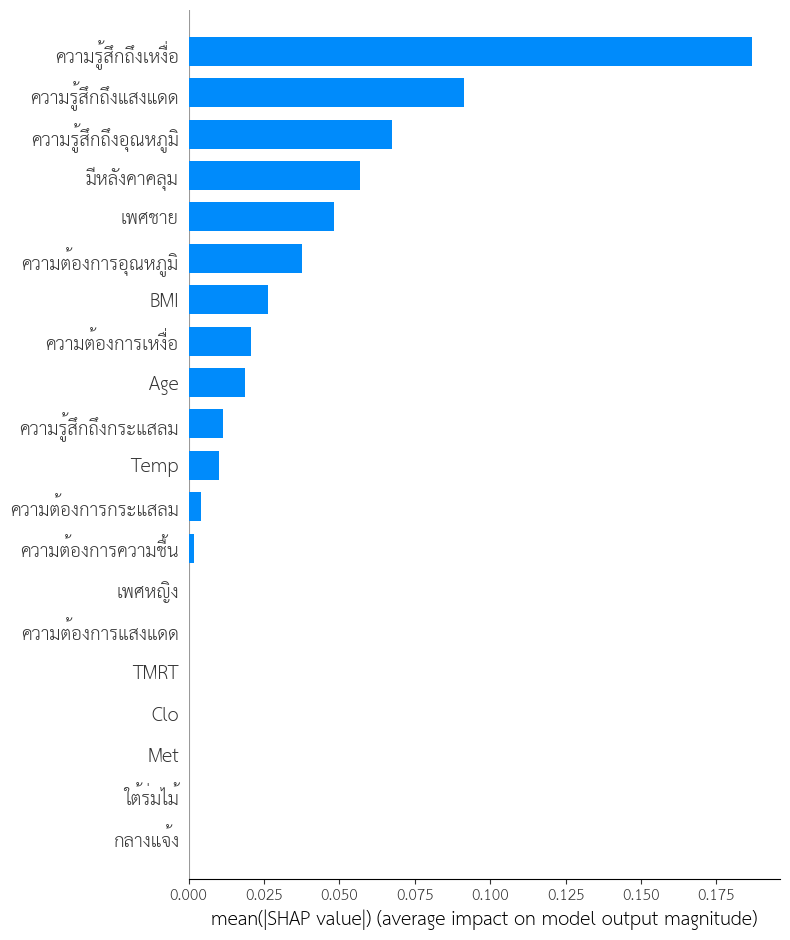

In [ ]:
masker = shap.maskers.Independent(data = X_train_res)
# SHAP Interpreter
shapExplainer = shap.LinearExplainer(lasso_reg,masker=masker)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
#shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')
class_names = [0,1]
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)

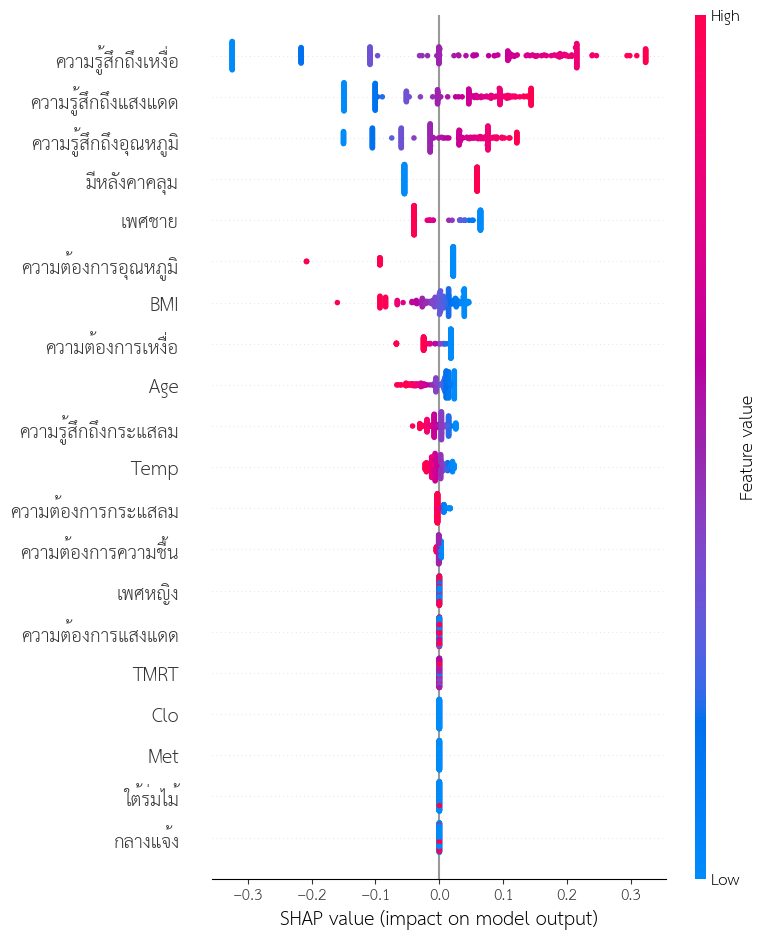

In [ ]:
shap.summary_plot(shapValues, X_train_res)

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
Attempting to set identical low and high ylims makes transformation singular; automatically expanding.


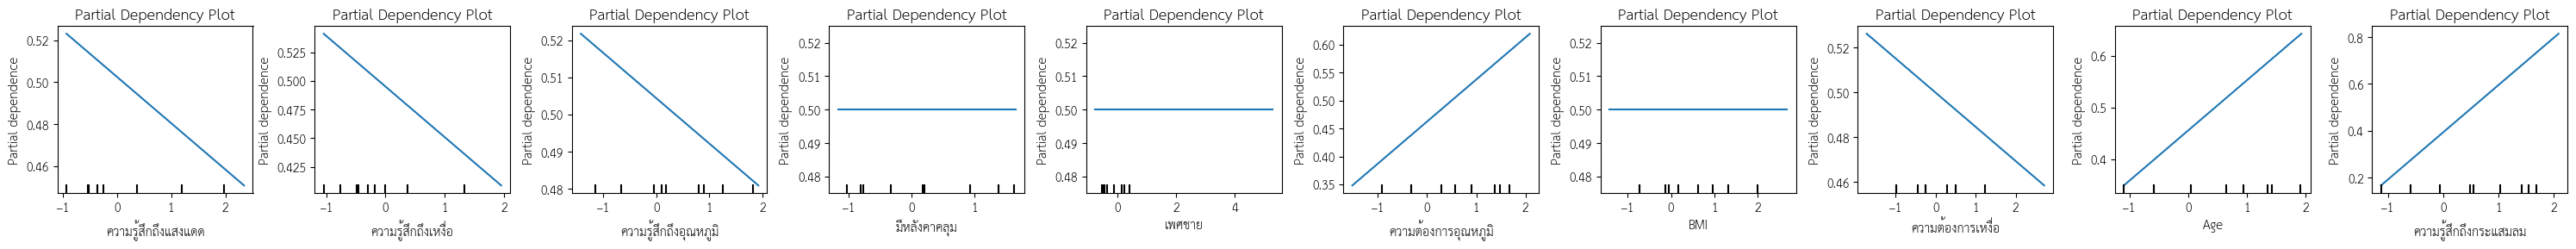

In [ ]:
base_features = ['ความรู้สึกถึงแสงแดด','ความรู้สึกถึงเหงื่อ','ความรู้สึกถึงอุณหภูมิ','มีหลังคาคลุม','เพศชาย','ความต้องการอุณหภูมิ','BMI','ความต้องการเหงื่อ','Age','ความรู้สึกถึงกระแสมลม']
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        lasso_reg,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

###PDP

X does not have valid feature names, but Lasso was fitted with feature names


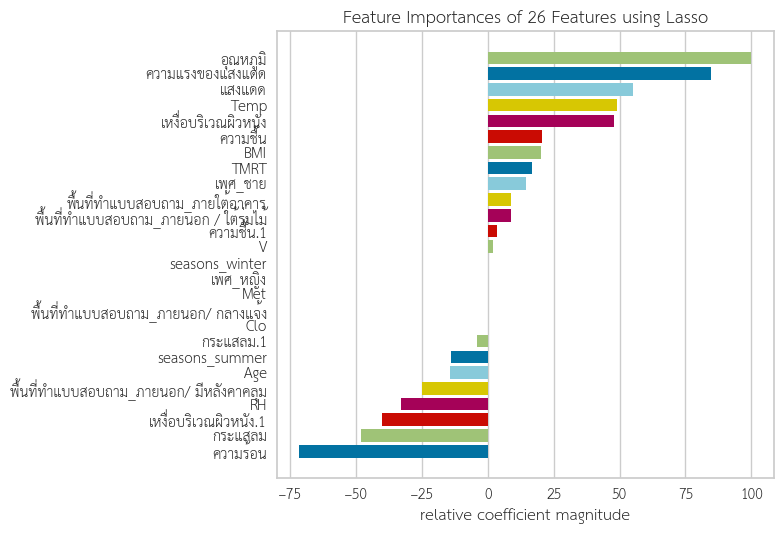

<Axes: title={'center': 'Feature Importances of 26 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(lasso_reg)
viz.fit(X, y2)
viz.show()

In [ ]:
base_features = ['ความรู้สึกถึงแสงแดด', 'ความรู้สึกถึงเหงื่อ', 'ความรู้สึกถึงอุณหภูมิ']

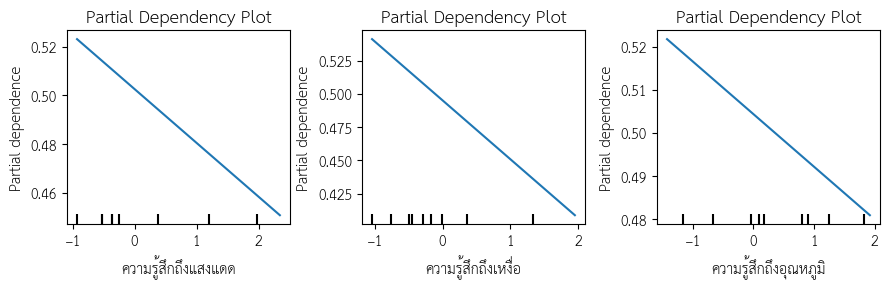

In [ ]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        lasso_reg,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

###Multiple Linear Regression

###TSV 2 ค่า

In [ ]:
regr = linear_model.LinearRegression()

parameters = {
    'copy_X': [True, False],
    'fit_intercept' : [True, False],
    'n_jobs' : [1,2,3],
    'positive' : [True, False]
}

model_cv = GridSearchCV(regr, parameters,)

model_cv.fit(X_train_res, y4_train_res)

print("Best parameters :", model_cv.best_score_)
print("Best accuracy :", model_cv.best_params_)

Best parameters : -0.5872468732258944
Best accuracy : {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': True}


In [ ]:
reg = linear_model.LinearRegression(copy_X = True, fit_intercept = False, n_jobs = 1, positive = True)

reg_reg = reg.fit(X_train_res, y4_train_res)

y_pred = reg.predict(X_test_scaled)

print('MSE_train:', format(mean_squared_error(y4_train_res, reg_reg.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y4_test, reg_reg.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y4_train_res, reg_reg.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y4_test, reg_reg.predict(X_test_scaled))))

MSE_train: 0.08750135514354457
MSE_test: 0.07835096858541024
MAE_train: 0.2295588168872589
MAE_test: 0.20006574968118943


###

In [ ]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test_scaled, y4_test)))

Coefficients:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.11014720e-02
 1.00077249e-02 6.60677962e-02 1.40733246e-02 0.00000000e+00
 1.40139968e-01 2.36416974e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.04532641e-02 0.00000000e+00 3.85525081e-02
 2.59696997e+15 0.00000000e+00 0.00000000e+00 2.53767024e-02
 9.46608400e-02 3.43800028e-02 0.00000000e+00 1.09252860e-01
 0.00000000e+00 4.53078035e-02]
Variance score: 0.6249563776453614


In [ ]:
coeff=reg.coef_.round(4)
coeff

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.11000000e-02,
       1.00000000e-02, 6.61000000e-02, 1.41000000e-02, 0.00000000e+00,
       1.40100000e-01, 2.36400000e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.05000000e-02, 0.00000000e+00, 3.86000000e-02,
       2.59696997e+15, 0.00000000e+00, 0.00000000e+00, 2.54000000e-02,
       9.47000000e-02, 3.44000000e-02, 0.00000000e+00, 1.09300000e-01,
       0.00000000e+00, 4.53000000e-02])

In [ ]:
#Intercept and Coefficient
print("Intercept: ", reg.intercept_)
print("Coefficients:")
list(zip(X, reg.coef_))

Intercept:  0.0
Coefficients:


[('Age', 0.0),
 ('BMI', 0.0),
 ('Temp', 0.0),
 ('RH', 0.05110147200560395),
 ('V', 0.010007724934683864),
 ('อุณหภูมิ', 0.0660677961767074),
 ('ความชื้น', 0.01407332458652094),
 ('กระแสลม', 0.0),
 ('ความแรงของแสงแดด', 0.14013996816688418),
 ('เหงื่อบริเวณผิวหนัง', 0.23641697354527072),
 ('ความร้อน', 0.0),
 ('ความชื้น.1', 0.0),
 ('กระแสลม.1', 0.0),
 ('แสงแดด', 0.020453264051940614),
 ('เหงื่อบริเวณผิวหนัง.1', 0.0),
 ('TMRT', 0.038552508063253325),
 ('Clo', 2596969974897621.5),
 ('Met', 0.0),
 ('พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้', 0.0),
 ('พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง', 0.025376702406433846),
 ('พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม', 0.0946608400148119),
 ('พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร', 0.03438000281159177),
 ('seasons_summer', 0.0),
 ('seasons_winter', 0.10925286024561788),
 ('เพศ_ชาย', 0.0),
 ('เพศ_หญิง', 0.045307803512458715)]

In [ ]:
#Prediction of test set
y_pred_reg = reg.predict(X_test_scaled)
#Predicted values
print("Prediction for test set: {}".format(y_pred_reg))

Prediction for test set: [ 0.2261659   0.09114517  0.33003961  0.7619122   0.04147209  0.02879722
  0.02370888  0.07633023  0.25213158  0.07324172 -0.04600749  0.06040589
 -0.17277384 -0.13857856 -0.12431704  0.568504    0.07036444  0.06567217
  0.84137986  0.19996946  0.92852012  0.17111905 -0.09255129  0.30291545
  0.99438486  1.14131514  0.65204098  0.72519267  0.23965962  0.79277462
  0.82449747  0.76302066  1.01900758  0.9928958   0.07692159  0.49595379
  0.69294293]


In [ ]:
#Actual value and the predicted value
reg_diff = pd.DataFrame({'Actual value': y4_test, 'Predicted value': y_pred_reg})
reg_diff.head(10)

,Actual value,Predicted value
1,0.0,0.226166
14,0.0,0.091145
20,0.0,0.330040
21,1.0,0.761912
39,0.0,0.041472
52,0.0,0.028797
54,0.0,0.023709
56,0.0,0.076330
58,0.0,0.252132
61,0.0,0.073242


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y4_test, y_pred_reg)
meanSqErr = metrics.mean_squared_error(y4_test, y_pred_reg)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y4_test, y_pred_reg))
print('R squared: {:.2f}'.format(reg.score(X,y4)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: -1270054332926618271138963527827456.00
Mean Absolute Error: 0.20006574968118943
Mean Square Error: 0.07835096858541024
Root Mean Square Error: 0.27991243020882484


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names


In [ ]:
linear_summary=pd.DataFrame({"features":X.columns,"coef":coeff})
linear_summary.sort_values("coef")

,features,coef
0,Age,0.000000e+00
22,seasons_summer,0.000000e+00
18,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,0.000000e+00
17,Met,0.000000e+00
14,เหงื่อบริเวณผิวหนัง.1,0.000000e+00
24,เพศ_ชาย,0.000000e+00
11,ความชื้น.1,0.000000e+00
10,ความร้อน,0.000000e+00
12,กระแสลม.1,0.000000e+00
7,กระแสลม,0.000000e+00


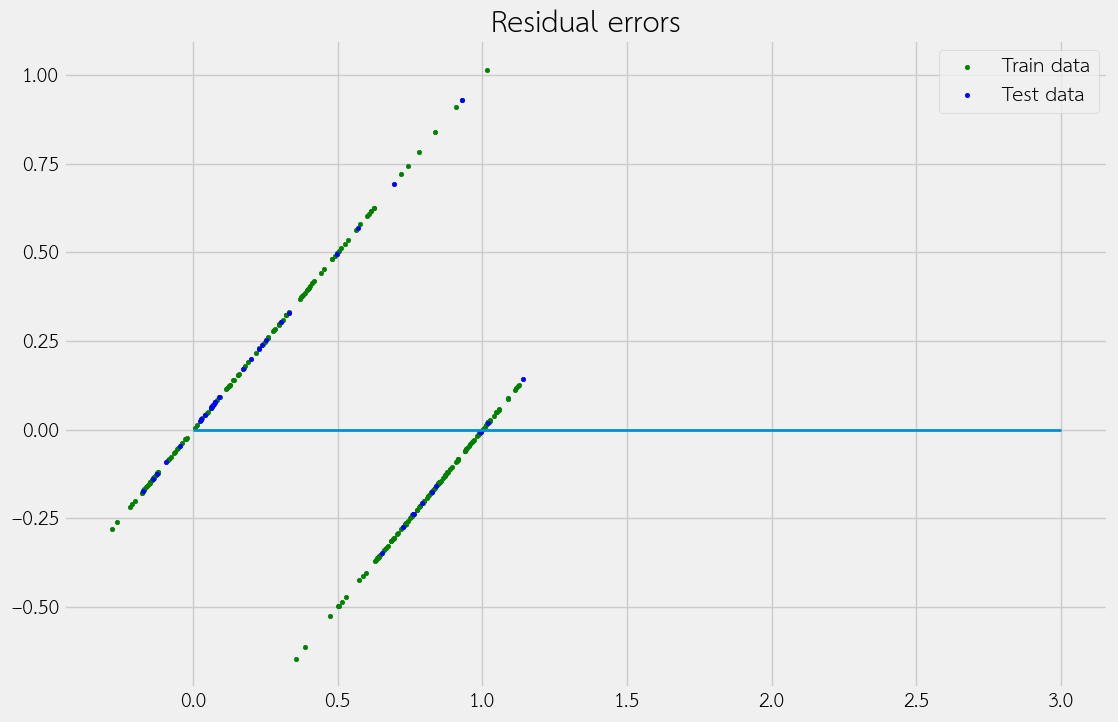

In [ ]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train_res),
            reg.predict(X_train_res) - y4_train_res,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test_scaled),
            reg.predict(X_test_scaled) - y4_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=3, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()

<ipython-input-119-c76afeb1c981>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


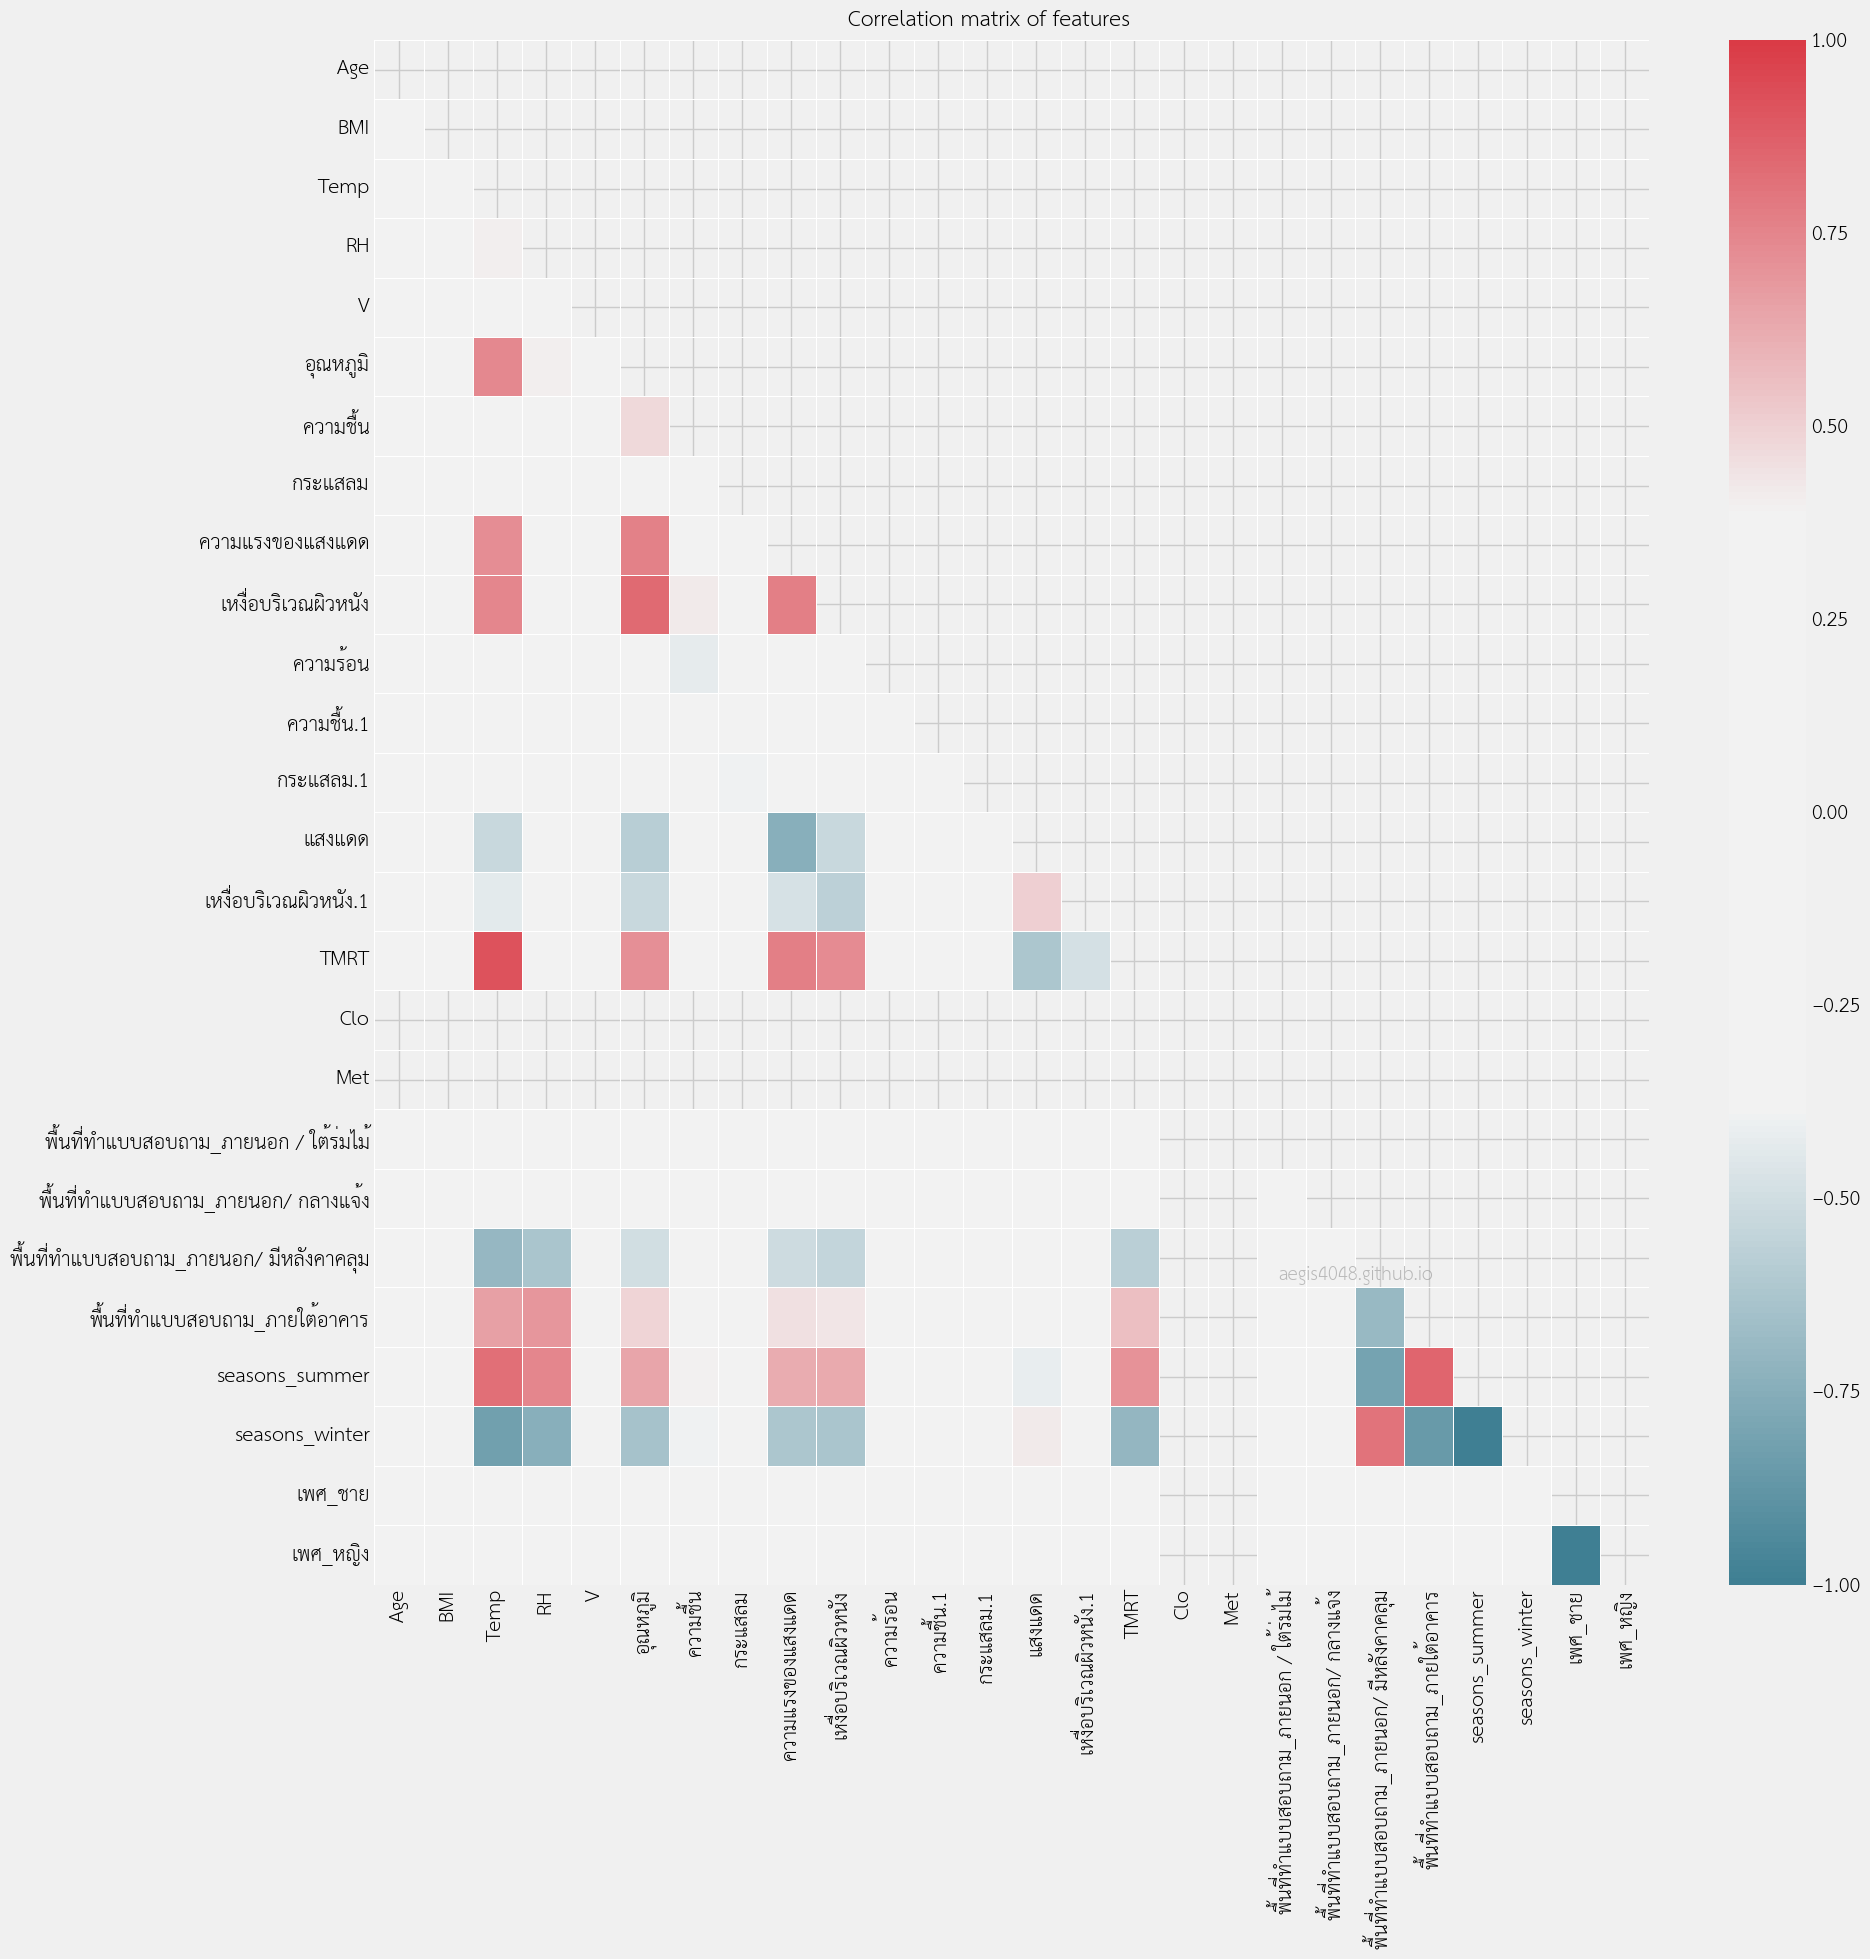

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

###SHAP

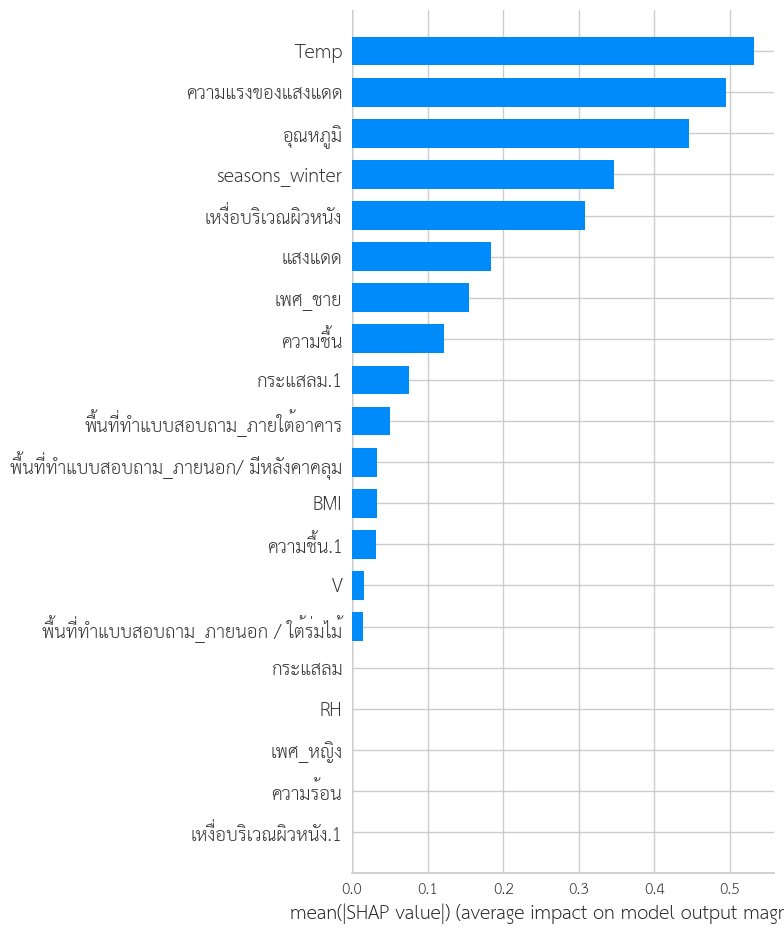

In [ ]:
masker = shap.maskers.Independent(data = X_train_res)
# SHAP Interpreter
shapExplainer = shap.LinearExplainer(reg_reg,masker=masker)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
#shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')
class_names = [0,1]
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)

###PDP

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
pd.Series(reg_reg.feature_importances_, index=X.columns)\
    .nlargest(10)\
    .plot(kind='barh', ax=ax)

In [ ]:
base_features = ['อุณหภูมิ', 'TMRT', 'Temp', 'เพศ_ชาย', 'Age']

In [ ]:
for bf in base_features:
      fig, ax = plt.subplots(figsize=(3, 3))
      ax.set_title("Partial Dependency Plot")
      PartialDependenceDisplay.from_estimator(reg_reg,
                                        X_train_res,
                                        features = [bf],
                                        feature_names = base_features,
                                        grid_resolution = 10,
                                        ax = ax)
      plt.show()

##Random Forest

In [ ]:
import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

###TSV 2 ค่า

In [ ]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,2,3,4]
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train_res, y4_train_res)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [ ]:
print("Best parameters :", clf.best_score_)
print("Best accuracy :", clf.best_params_)

Best parameters : 0.24778274630783223
Best accuracy : {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 300}


In [ ]:
rdf_reg = RandomForestRegressor(max_depth = 4, max_features = 'auto', n_estimators = 300)

# Train the model
resultss = rdf_reg.fit(X_train_res, y4_train_res)

# Make predictions on the test set
y_pred = rdf_reg.predict(X_test_scaled)
#print(confusion_matrix(y3_test,y_pred))
#print(classification_report(y3_test,y_pred))
print('MSE_train:', format(mean_squared_error(y4_train_res, resultss.predict(X_train_res))))
print('MSE_test:', format(mean_squared_error(y4_test, resultss.predict(X_test_scaled))))

print('MAE_train:', format(mean_absolute_error(y4_train_res, resultss.predict(X_train_res))))
print('MAE_test:', format(mean_absolute_error(y4_test, resultss.predict(X_test_scaled))))

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


MSE_train: 0.019604700793941155
MSE_test: 0.06628400791291653
MAE_train: 0.06302842956176376
MAE_test: 0.13418174411495187


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


###Plot Random Forest

In [ ]:
!pip install dtreeviz
!apt-get install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
import dtreeviz # will be used for tree visualization

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
#from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

TSV 2 ค่า

In [ ]:
rdf_reg = RandomForestRegressor(max_depth = 4, max_features = 'auto', n_estimators = 300)

# Train the model
resultss = rdf_reg.fit(X_train_res, y4_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


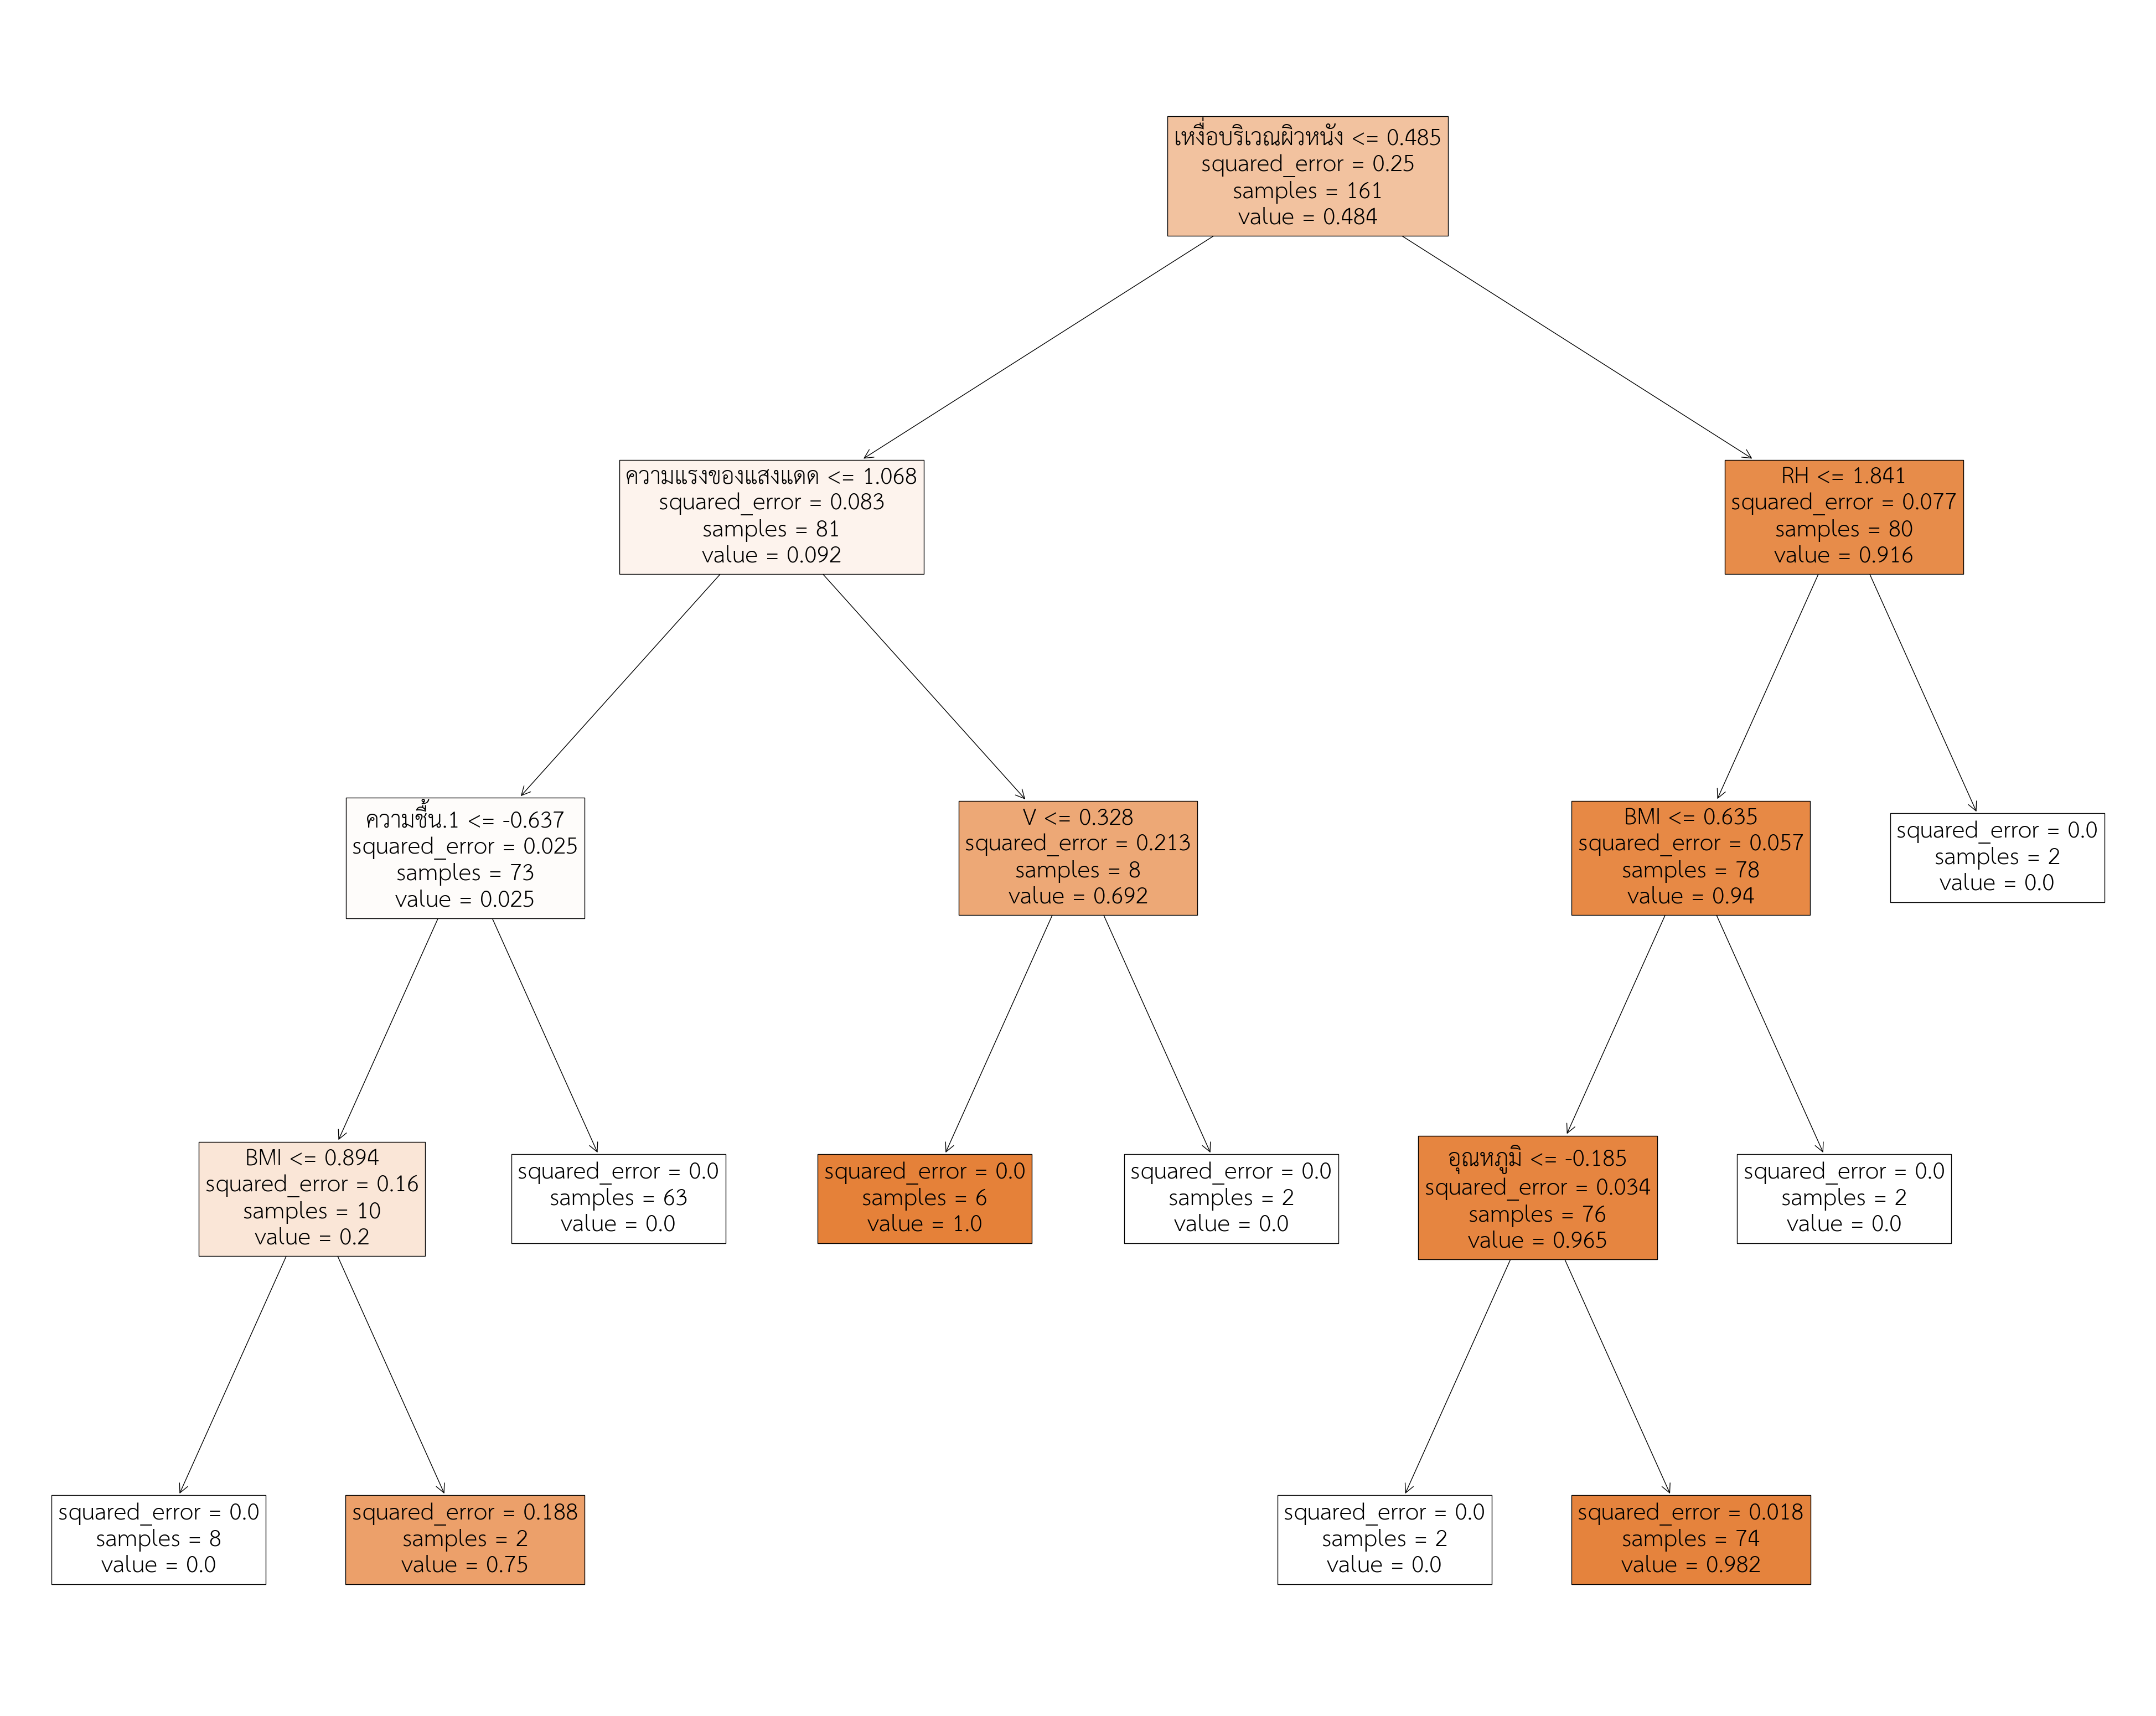

In [ ]:
plt.figure(figsize=(50,40))
_ = tree.plot_tree(rdf_reg.estimators_[0], feature_names=X.columns, filled=True)

###SHAP

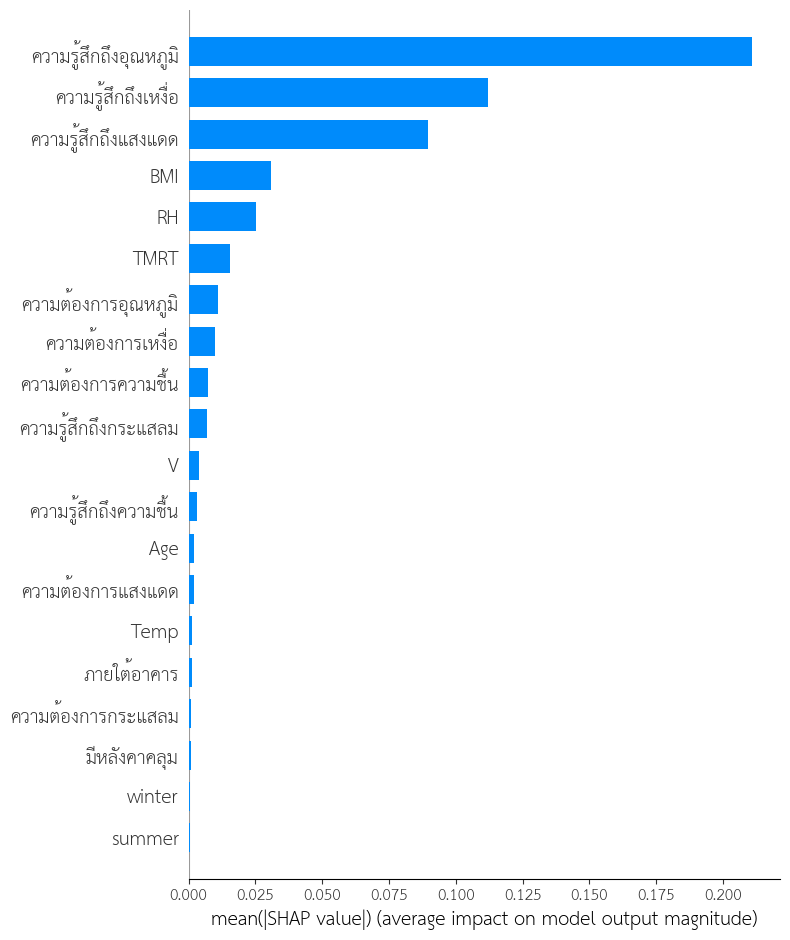

In [ ]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(resultss)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)


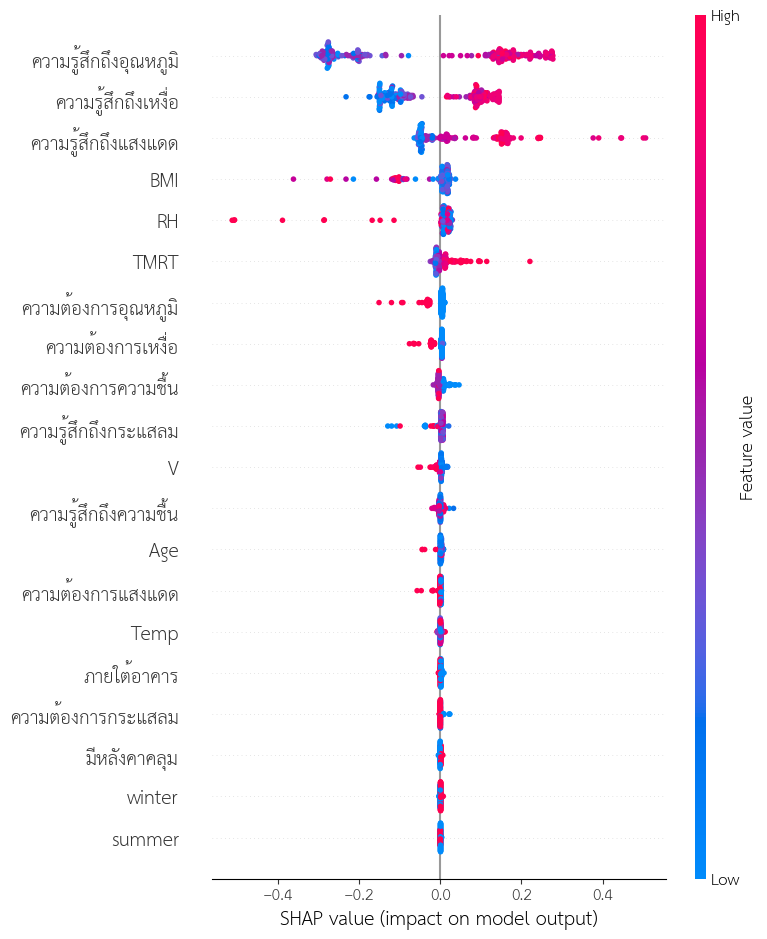

In [ ]:
shap.summary_plot(shapValues, X_train_res)

###PDP

<Axes: >

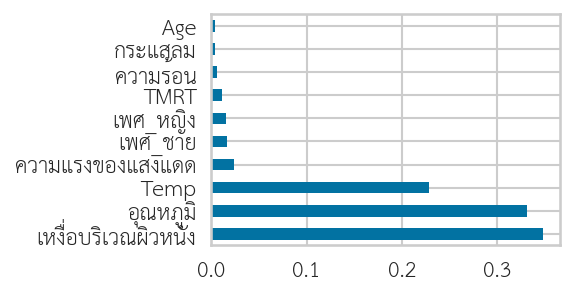

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=150)
pd.Series(resultss.feature_importances_, index=X.columns)\
    .nlargest(10)\
    .plot(kind='barh', ax=ax)

In [ ]:
base_features = ['ความรู้สึกถึงอุณหภูมิ','ความรู้สึกถึงเหงื่อ','ความรู้สึกถึงแสงแดด']

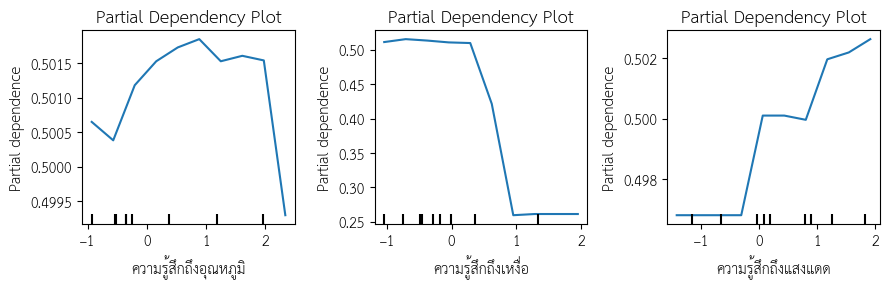

In [ ]:
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        resultss,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        grid_resolution = 10,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()